In [96]:
import pandas as pd 
from bertopic import BERTopic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import math
from collections import Counter
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from ast import literal_eval
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP


import dataframe_image as dfi


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicjadorobis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alicjadorobis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# the data has previously been translated
# loading the data into a dataframe
df = pd.read_excel('3800_reviews_english.xlsx')
display(df)

,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChdDSUhNMG9nS0VJQ0FnSUNsMV9lcHJBRRAB,CAESBkVnSUlBUQ==,...,1,1701202705,11/28/2023 20:18:25,0,8.289596e+18,13,1,1,3,16
1,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChZDSUhNMG9nS0VJQ0FnSUM1dHItVmN3EAE,CAESBkVnSUlBZw==,...,2,1697189187,10/13/2023 09:26:27,0,8.289596e+18,13,1,1,3,16
2,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChZDSUhNMG9nS0VJQ0FnSUNnc0p2aEh3EAE,CAESBkVnSUlBdw==,...,5,1512381515,12/04/2017 09:58:35,1,8.289596e+18,13,1,1,3,16
3,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChZDSUhNMG9nS0VJQ0FnSURRek5pUlJBEAE,CAESBkVnSUlCQQ==,...,1,1533110248,08/01/2018 07:57:28,2,8.289596e+18,13,1,1,3,16
4,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChdDSUhNMG9nS0VJQ0FnSURXNE5MOGtRRRAB,CAESBkVnSUlCUQ==,...,5,1647080014,03/12/2022 10:13:34,1,8.289596e+18,13,1,1,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,ChIJGU-a6R8XxkcR5cxWLxQYpgs,OV Fietsen,0x47c6171fe99a4f19:0xba618142f56cce5,ChIJGU-a6R8XxkcR5cxWLxQYpgs,https://www.google.com/maps/place/OV+Fietsen/@...,https://search.google.com/local/reviews?placei...,10,4.0,ChdDSUhNMG9nS0VJQ0FnSUNaal8tWTZRRRAB,CAESBkVnSUlCZw==,...,4,1695228993,09/20/2023 16:56:33,0,8.393849e+17,1,0,2,2,5
3831,ChIJGU-a6R8XxkcR5cxWLxQYpgs,OV Fietsen,0x47c6171fe99a4f19:0xba618142f56cce5,ChIJGU-a6R8XxkcR5cxWLxQYpgs,https://www.google.com/maps/place/OV+Fietsen/@...,https://search.google.com/local/reviews?placei...,10,4.0,ChdDSUhNMG9nS0VJQ0FnSUQyaUpDUTJnRRAB,CAESBkVnSUlCdw==,...,5,1651678515,05/04/2022 15:35:15,0,8.393849e+17,1,0,2,2,5
3832,ChIJGU-a6R8XxkcR5cxWLxQYpgs,OV Fietsen,0x47c6171fe99a4f19:0xba618142f56cce5,ChIJGU-a6R8XxkcR5cxWLxQYpgs,https://www.google.com/maps/place/OV+Fietsen/@...,https://search.google.com/local/reviews?placei...,10,4.0,ChdDSUhNMG9nS0VJQ0FnSUMwZzhISXF3RRAB,CAESBkVnSUlDQQ==,...,5,1570529410,10/08/2019 10:10:10,0,8.393849e+17,1,0,2,2,5
3833,ChIJGU-a6R8XxkcR5cxWLxQYpgs,OV Fietsen,0x47c6171fe99a4f19:0xba618142f56cce5,ChIJGU-a6R8XxkcR5cxWLxQYpgs,https://www.google.com/maps/place/OV+Fietsen/@...,https://search.google.com/local/reviews?placei...,10,4.0,ChZDSUhNMG9nS0VJQ0FnSUQyMDZMcldBEAE,CAESBkVnSUlDUQ==,...,4,1653385071,05/24/2022 09:37:51,0,8.393849e+17,1,0,2,2,5


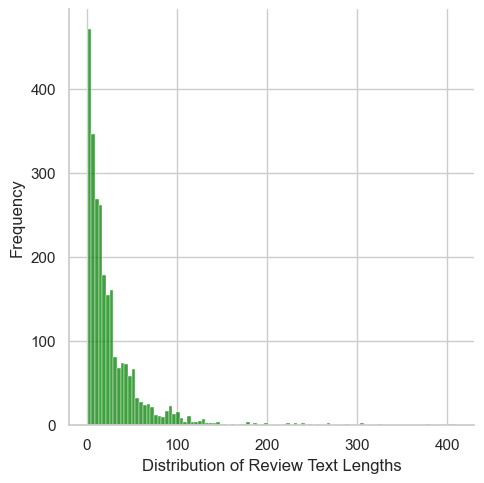

In [130]:
# creating a new column containing the length of each headline text that is larger than 0
non_empty_lengths = df[(df['review_text_english'].notnull()) & (df['review_text_english_len'] > 0)]['review_text_english_len']
# visualising the length distribution 

sns.set(rc={'figure.figsize':(14,11)})
sns.set(style="whitegrid")
sns.displot(non_empty_lengths, kde=False, color='green', bins=100)


plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Distribution of Review Text Lengths', fontsize=12)
plt.grid(True)


plt.show()

## Pre-processing the text

In [32]:

#removing line spacing and 'at' symbols
df = df.replace('\n',' ', regex=True)
df = df.replace('\xa0',' ', regex=True)

# during the transaltion all reviews without text were replace as 'into' this code deletes replaces it with an empty cell
df.loc[df['review_text_english'].str.strip() == 'into', 'review_text_english'] = ''


In [33]:
# removing all emojis
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


df['review_text_english'] = df['review_text_english'].apply(remove_emojis)

In [124]:
#removing numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)
df['review_text_english'] = df['review_text_english'].apply(remove_numbers)

In [125]:
#removing punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


df['review_text_english'] = df['review_text_english'].apply(remove_punctuation)


In [126]:
# manually replacing synonyms and words that were incorrectly translated
df['review_text_english'] = df['review_text_english'].str.replace(r'\b(?:bicycle|bikes)\b', 'bike', case=False, regex=True)

df['review_text_english'] = df['review_text_english'].str.replace('places', 'place', case=False)

df['review_text_english'] = df['review_text_english'].str.replace('parkeerplaats', 'parking', case=False)

df['review_text_english'] = df['review_text_english'].str.replace('easily', 'easy', case=False)

df['review_text_english'] = df['review_text_english'].str.replace('authentica', 'authentic', case=False)
df['review_text_english'] = df['review_text_english'].str.replace('genial', 'great', case=False)
df['review_text_english'] = df['review_text_english'].str.replace('pŕ', 'pr', case=False)
df['review_text_english'] = df['review_text_english'].str.replace('combinatie', 'combination', case=False)


1. case-normalization


In [103]:
text_list = df['review_text_english'].to_list()

#case - normalisation
def case_normalization(text):
    return text.lower()
normalized_text_list = [case_normalization(word) for word in text_list]

print(text_list)


['Watied  minutes with a guy who did not know how to work the cash register before the repairman showed up just to discover they did not repair my flat tyre of the bike I brought in the day before Lousy customer service New level of not giving a f', 'I had a flat tire and they refused to fix it because it was electric bike The back row had nothing to do with the electric part since Ive only made it electric by changing the front tire myself I had to walk an hour to find another shop after this Dont go here if you have electric bike', 'These guys were super sweet to me fixed my bike way faster than anticipated and cheap And they speak good English The whole thing cost me  euros for a new tube including the service I really recommend them', 'This place used to be good Now it is another level of I dont care  Not only they do not care about the speed of repairs they say they will call youtext you when bike is ready or when there are issues with repair Instead they just do nothing and act s

0        49
1        59
2        38
3       150
4        24
       ... 
3830      0
3831      0
3832      0
3833      0
3834      0
Name: review_text_english_len, Length: 3835, dtype: int64

## Visualisation

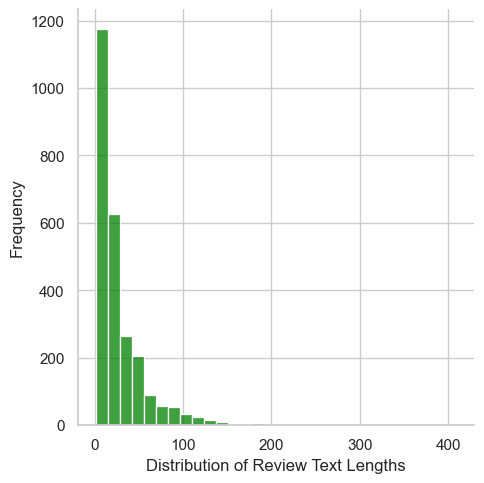

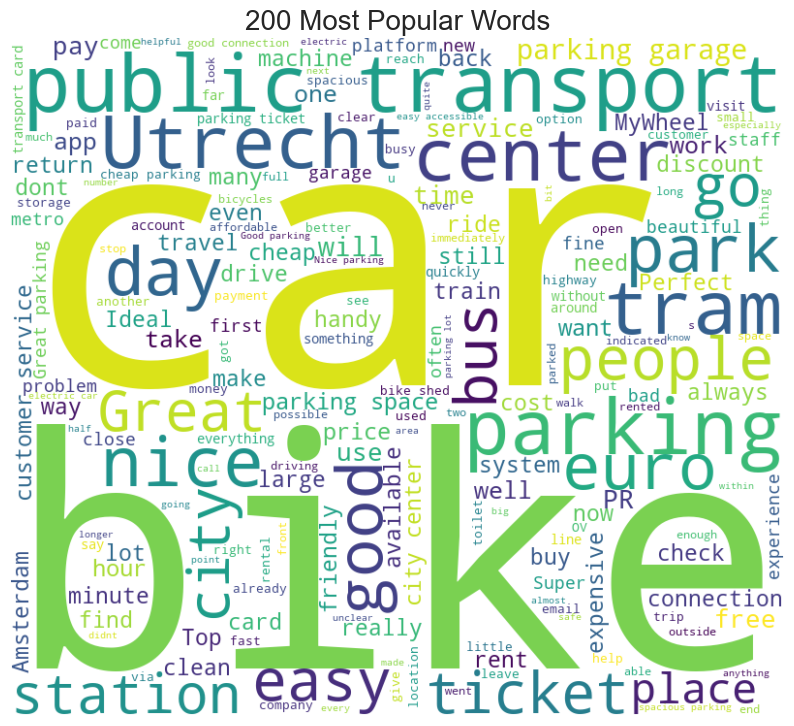

In [140]:
# words visualisation with a wordcloud
concatenated_text = ' '.join(text_list)
# generating
wordcloud = WordCloud(width=800, height=700, max_words=200, background_color='white').generate(concatenated_text)

# plotting the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('200 Most Popular Words', size= 20)
plt.show()

## Further pre-processing

2. tokenization

In [40]:

def tokenization(text):
    return text.split()
    
tokenized_text_list = [tokenization(word) for word in normalized_text_list]

print(tokenized_text_list)

[['watied', 'minutes', 'with', 'a', 'guy', 'who', 'did', 'not', 'know', 'how', 'to', 'work', 'the', 'cash', 'register', 'before', 'the', 'repairman', 'showed', 'up', 'just', 'to', 'discover', 'they', 'did', 'not', 'repair', 'my', 'flat', 'tyre', 'of', 'the', 'bike', 'i', 'brought', 'in', 'the', 'day', 'before', 'lousy', 'customer', 'service', 'new', 'level', 'of', 'not', 'giving', 'a', 'f'], ['i', 'had', 'a', 'flat', 'tire', 'and', 'they', 'refused', 'to', 'fix', 'it', 'because', 'it', 'was', 'electric', 'bike', 'the', 'back', 'row', 'had', 'nothing', 'to', 'do', 'with', 'the', 'electric', 'part', 'since', 'ive', 'only', 'made', 'it', 'electric', 'by', 'changing', 'the', 'front', 'tire', 'myself', 'i', 'had', 'to', 'walk', 'an', 'hour', 'to', 'find', 'another', 'shop', 'after', 'this', 'dont', 'go', 'here', 'if', 'you', 'have', 'electric', 'bike'], ['these', 'guys', 'were', 'super', 'sweet', 'to', 'me', 'fixed', 'my', 'bike', 'way', 'faster', 'than', 'anticipated', 'and', 'cheap', 'and

3. stopwords removal 

In [41]:

custom_stopwords = ['facile','it', 'its', 'lick','dramais','anyway','italy', 'wouter', '€','busysoooooo','fc','uuuuuuuu','magn','also', 'said', 'one', 'per', 'get', 'could', 'would', 'ev', 'u', 'make', 'av', 'It', 'The', 'This', 'say', 'In', 'I', 'http','year', 'center', 'utrecht', 'amsterdam', 'city', 'centre', 'ticket', 'day', 'go','also','one','first','come','take','get',]

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english')).union(set(custom_stopwords or []))  # adding the custom stopwords and english
    return [token for token in tokens if token not in stop_words]

tokens = [remove_stopwords(word) for word in tokenized_text_list]
print(tokens)

[['watied', 'minutes', 'guy', 'know', 'work', 'cash', 'register', 'repairman', 'showed', 'discover', 'repair', 'flat', 'tyre', 'bike', 'brought', 'lousy', 'customer', 'service', 'new', 'level', 'giving', 'f'], ['flat', 'tire', 'refused', 'fix', 'electric', 'bike', 'back', 'row', 'nothing', 'electric', 'part', 'since', 'ive', 'made', 'electric', 'changing', 'front', 'tire', 'walk', 'hour', 'find', 'another', 'shop', 'dont', 'electric', 'bike'], ['guys', 'super', 'sweet', 'fixed', 'bike', 'way', 'faster', 'anticipated', 'cheap', 'speak', 'good', 'english', 'whole', 'thing', 'cost', 'euros', 'new', 'tube', 'including', 'service', 'really', 'recommend'], ['place', 'used', 'good', 'another', 'level', 'dont', 'care', 'care', 'speed', 'repairs', 'call', 'youtext', 'bike', 'ready', 'issues', 'repair', 'instead', 'nothing', 'act', 'surprised', 'show', 'ask', 'takes', 'long', 'left', 'bike', 'repair', 'thursday', 'friday', 'told', 'sorry', 'monday', 'monday', 'shop', 'course', 'message', 'bike',

In [42]:
# transforming into a string to create a model
tokens = [str(token) for token in tokens]
print(tokens)
tokens = [string.strip("'") for string in tokens if string.strip("[]").strip("'")]

["['watied', 'minutes', 'guy', 'know', 'work', 'cash', 'register', 'repairman', 'showed', 'discover', 'repair', 'flat', 'tyre', 'bike', 'brought', 'lousy', 'customer', 'service', 'new', 'level', 'giving', 'f']", "['flat', 'tire', 'refused', 'fix', 'electric', 'bike', 'back', 'row', 'nothing', 'electric', 'part', 'since', 'ive', 'made', 'electric', 'changing', 'front', 'tire', 'walk', 'hour', 'find', 'another', 'shop', 'dont', 'electric', 'bike']", "['guys', 'super', 'sweet', 'fixed', 'bike', 'way', 'faster', 'anticipated', 'cheap', 'speak', 'good', 'english', 'whole', 'thing', 'cost', 'euros', 'new', 'tube', 'including', 'service', 'really', 'recommend']", "['place', 'used', 'good', 'another', 'level', 'dont', 'care', 'care', 'speed', 'repairs', 'call', 'youtext', 'bike', 'ready', 'issues', 'repair', 'instead', 'nothing', 'act', 'surprised', 'show', 'ask', 'takes', 'long', 'left', 'bike', 'repair', 'thursday', 'friday', 'told', 'sorry', 'monday', 'monday', 'shop', 'course', 'message', 

5. stemming and lemmatization

In [43]:


# initialising stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# stemming
stemmed_words = [stemmer.stem(token) for token in tokens]

# lemmatization
lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]


print("Stemmed Tokens:", stemmed_words)
print("Lemmatized Tokens:", lemmatized_words)
tokens = lemmatized_words

Stemmed Tokens: ["['watied', 'minutes', 'guy', 'know', 'work', 'cash', 'register', 'repairman', 'showed', 'discover', 'repair', 'flat', 'tyre', 'bike', 'brought', 'lousy', 'customer', 'service', 'new', 'level', 'giving', 'f']", "['flat', 'tire', 'refused', 'fix', 'electric', 'bike', 'back', 'row', 'nothing', 'electric', 'part', 'since', 'ive', 'made', 'electric', 'changing', 'front', 'tire', 'walk', 'hour', 'find', 'another', 'shop', 'dont', 'electric', 'bike']", "['guys', 'super', 'sweet', 'fixed', 'bike', 'way', 'faster', 'anticipated', 'cheap', 'speak', 'good', 'english', 'whole', 'thing', 'cost', 'euros', 'new', 'tube', 'including', 'service', 'really', 'recommend']", "['place', 'used', 'good', 'another', 'level', 'dont', 'care', 'care', 'speed', 'repairs', 'call', 'youtext', 'bike', 'ready', 'issues', 'repair', 'instead', 'nothing', 'act', 'surprised', 'show', 'ask', 'takes', 'long', 'left', 'bike', 'repair', 'thursday', 'friday', 'told', 'sorry', 'monday', 'monday', 'shop', 'cour

# Analysis

1. Bag of words 

In [44]:

def bag_of_words(tokens):
    return Counter(tokens)

bag_of_words(tokens)

Counter({"['good']": 10,
         "['great']": 5,
         "['always', 'place']": 5,
         "['nice']": 4,
         "['top']": 4,
         "['perfect']": 4,
         "['bringing', 'car', 'back', 'exactly', 'spot', 'picked', 'forward', 'euro', 'fine', '‘parking', 'spot', 'electric', 'vehicles’', 'customer', 'support', 'completely', 'rude', 'lost', 'loyal', 'customer', 'never', 'use']": 4,
         "['poorer', 'rental', 'experience', 'ever', 'car', 'didn’t', 'start', 'twice', 'top', 'customer', 'service', 'miserable', 'app', 'deleted', 'never', 'use']": 4,
         "['way', 'trip', 'sense', 'rented', 'car', 'near', 'amsterdamse', 'bos', 'ended', 'trip', 'haarlem', 'received', 'sms', 'message', 'return', 'car', 'back', 'specific', 'zone', 'pay', 'fine', 'well', 'business', 'model', 'sucks', 'app', 'completing', 'oneway', 'trip', 'see', 'confirmation', 'joırney', 'completed', 'knew', 'beginning', 'even', 'download', 'app', 'place', 'way', 'trip', 'possible', 'competitors', 'use', 'going'

# Modelling

In [82]:


# preparing embeddings
sentence_model = SentenceTransformer("paraphrase-MiniLM-L3-v2")
embeddings = sentence_model.encode(tokens, show_progress_bar=False)

# training BERTopic
model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size=16, nr_topics=11)
review_topics, _ = model.fit_transform(tokens)

# running the visualization with the original embeddings
model.visualize_documents(tokens, embeddings=embeddings)

# reducing dimensionality of embeddings
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)



Batches: 100%|██████████| 81/81 [00:17<00:00,  4.66it/s]
2024-01-15 21:16:04,008 - BERTopic - Transformed documents to Embeddings
2024-01-15 21:16:10,512 - BERTopic - Reduced dimensionality
2024-01-15 21:16:10,590 - BERTopic - Clustered reduced embeddings
2024-01-15 21:16:10,727 - BERTopic - Reduced number of topics from 13 to 11


In [143]:
from sklearn.metrics.pairwise import cosine_similarity

# get topic vectors
topic_vectors = model.transform(tokens)

# compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(topic_vectors)

# Display the similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)

Batches:   0%|          | 0/81 [00:00<?, ?it/s]

Batches: 100%|██████████| 81/81 [00:29<00:00,  2.75it/s]
2024-01-15 22:48:04,274 - BERTopic - Reduced dimensionality
2024-01-15 22:48:04,410 - BERTopic - Predicted clusters


Cosine Similarity Matrix:
[[1.         0.31241541]
 [0.31241541 1.        ]]


In [83]:
model.visualize_documents(tokens, reduced_embeddings=reduced_embeddings)

Topic Extraction and Representation

In [100]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

frequency = model.get_topic_info()
print("Number of topics: {}".format( len(frequency)))
display(frequency)
dfi.export(frequency, 'dataframe_topics.png')

Number of topics: 11


,Topic,Count,Name,Representation,Representative_Docs
0,-1,323,-1_beautiful_nice_place_good,"[beautiful, nice, place, good, ideal, top, eas...","[['good', 'place', 'park'], ['nice', 'place', ..."
1,0,1870,0_parking_bike_car_transport,"[parking, bike, car, transport, public, tram, ...","[['great', 'parking', 'easy', 'tram'], ['easy'..."
2,1,82,1_great_good_nice_excellent,"[great, good, nice, excellent, pretty, well, e...","[['great', 'p', 'r'], ['great'], ['nice', 'goo..."
3,2,75,2_station_busy_south_nice,"[station, busy, south, nice, stations, beautif...","[['train', 'station', 'busy'], ['good', 'stati..."
4,3,61,3_staff_friendly_service_rude,"[staff, friendly, service, rude, good, helpful...","[['friendly', 'staff'], ['friendly', 'staff'],..."
5,4,47,4_expensive_price_good_nice,"[expensive, price, good, nice, arranged, servi...","[['perfect', 'expensive'], ['expensive'], ['ex..."
6,5,31,5_easy_reach_handy_connection,"[easy, reach, handy, connection, reliable, top...","[['easy', 'reach', 'easy', 'reach'], ['easy', ..."
7,6,30,6_always_ok_place_drama,"[always, ok, place, drama, confusing, spot, bi...","[['always', 'place'], ['always', 'place'], ['a..."
8,7,22,7_spacious_easy_accessible_place,"[spacious, easy, accessible, place, drive, fit...","[['spacious', 'easy', 'accessible'], ['spaciou..."
9,8,18,8_cheap_pack_perfect_super,"[cheap, pack, perfect, super, covered, cheapwa...","[['perfect', 'cheap'], ['cheap'], ['cheap']]"


-1 refers to all outliers and should typically be ignored. Next, let's take a look at the most frequent topic that was generated, topic 0:

In [85]:
model.get_topic(0)

[('parking', 0.043724873189067655),
 ('bike', 0.03330053294285552),
 ('car', 0.030607803826038164),
 ('transport', 0.02778499476638052),
 ('public', 0.027500244275990716),
 ('tram', 0.025534572933147565),
 ('euros', 0.020224215480289368),
 ('bus', 0.02021462272002041),
 ('people', 0.019945552139577622),
 ('garage', 0.019043771068112697)]

In [86]:
model.get_document_info(tokens)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"['watied', 'minutes', 'guy', 'know', 'work', '...",0,0_parking_bike_car_transport,"[parking, bike, car, transport, public, tram, ...","[['great', 'parking', 'easy', 'tram'], ['easy'...",parking - bike - car - transport - public - tr...,1.000000,False
1,"['flat', 'tire', 'refused', 'fix', 'electric',...",0,0_parking_bike_car_transport,"[parking, bike, car, transport, public, tram, ...","[['great', 'parking', 'easy', 'tram'], ['easy'...",parking - bike - car - transport - public - tr...,1.000000,False
2,"['guys', 'super', 'sweet', 'fixed', 'bike', 'w...",0,0_parking_bike_car_transport,"[parking, bike, car, transport, public, tram, ...","[['great', 'parking', 'easy', 'tram'], ['easy'...",parking - bike - car - transport - public - tr...,1.000000,False
3,"['place', 'used', 'good', 'another', 'level', ...",0,0_parking_bike_car_transport,"[parking, bike, car, transport, public, tram, ...","[['great', 'parking', 'easy', 'tram'], ['easy'...",parking - bike - car - transport - public - tr...,1.000000,False
4,"['place', 'contains', 'bike', 'repairshop', 'n...",0,0_parking_bike_car_transport,"[parking, bike, car, transport, public, tram, ...","[['great', 'parking', 'easy', 'tram'], ['easy'...",parking - bike - car - transport - public - tr...,1.000000,False
...,...,...,...,...,...,...,...,...
2571,"['nice', 'employeesneat', 'storage']",-1,-1_beautiful_nice_place_good,"[beautiful, nice, place, good, ideal, top, eas...","[['good', 'place', 'park'], ['nice', 'place', ...",beautiful - nice - place - good - ideal - top ...,0.000000,False
2572,"['doesnt', 'work']",6,6_always_ok_place_drama,"[always, ok, place, drama, confusing, spot, bi...","[['always', 'place'], ['always', 'place'], ['a...",always - ok - place - drama - confusing - spot...,1.000000,False
2573,"['easy', 'safe', 'bike', 'park', 'free', 'free']",0,0_parking_bike_car_transport,"[parking, bike, car, transport, public, tram, ...","[['great', 'parking', 'easy', 'tram'], ['easy'...",parking - bike - car - transport - public - tr...,0.940366,False
2574,"['location', 'public', 'transport', 'bicycles'...",0,0_parking_bike_car_transport,"[parking, bike, car, transport, public, tram, ...","[['great', 'parking', 'easy', 'tram'], ['easy'...",parking - bike - car - transport - public - tr...,1.000000,False


Top terms and c-TF-IDF scores

In [87]:
a_topic = frequency.iloc[1]["Topic"] # selecting the 1st topic
model.get_topic(a_topic) # showing the words and their c-TF-IDF scores

[('parking', 0.043724873189067655),
 ('bike', 0.03330053294285552),
 ('car', 0.030607803826038164),
 ('transport', 0.02778499476638052),
 ('public', 0.027500244275990716),
 ('tram', 0.025534572933147565),
 ('euros', 0.020224215480289368),
 ('bus', 0.02021462272002041),
 ('people', 0.019945552139577622),
 ('garage', 0.019043771068112697)]

Topic visualisation


In [88]:

model.visualize_barchart(top_n_topics=17, n_words= 10, width = 300, height = 350)

In [75]:
model.visualize_topics()

In [101]:
# Calculate the percentage representation of topics

your_docs = tokens
topic_counts = Counter(review_topics)
total_documents = len(your_docs)
topic_percentages = {topic: count / total_documents * 100 for topic, count in topic_counts.items()}
topic_percentages = {topic: round(count / total_documents * 100, 2) for topic, count in topic_counts.items()}

# Create a DataFrame from the topic percentages
df_topic_percentages = pd.DataFrame(list(topic_percentages.items()), columns=['Topic', 'Percentage of documents in a topic'])
df_topic_percentages = df_topic_percentages.sort_values(by='Topic', ascending=True)
df_topic_percentages['Percentage of documents in a topic'] = df_topic_percentages['Percentage of documents in a topic'].astype(str) + '%'

# Display the DataFrame
display(df_topic_percentages)

dfi.export(df_topic_percentages, 'dataframe_topics%.png')

,Topic,Percentage of documents in a topic
3,-1,12.54%
0,0,72.59%
5,1,3.18%
4,2,2.91%
2,3,2.37%
6,4,1.82%
8,5,1.2%
1,6,1.16%
10,7,0.85%
7,8,0.7%


In [90]:
model.visualize_hierarchy(top_n_topics=30)

In [91]:
similar_topics, similarity = model.find_topics("politics", top_n = 3)
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('always', 0.5015271330305474), ('ok', 0.4227863078637988), ('place', 0.41250118217009774), ('drama', 0.2351294643942437), ('confusing', 0.2254878368170022), ('spot', 0.17943554264645534), ('bit', 0.16755369547521282), ('everything', 0.16002908952851355), ('unavailable', 0.15494956708765367), ('winner', 0.15494956708765367)]
Similarity Score: 0.13532403968221576


In [92]:
#saving the model
model.save("bert_best_model_")

# loading the serialised model
my_best_model = BERTopic.load("bert_best_model")
my_best_model